<a href="https://colab.research.google.com/github/vlx300/kb_colab/blob/master/API_Testing__In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Web API Testing in Python**

![alt text](https://previews.123rf.com/images/melpomen/melpomen1906/melpomen190600246/124462135-api-concept-with-businessman-on-a-dark-blue-background.jpg)

A web API is part of a website that is designed to interact with programs that use very speciic URLs to request specific information from a website. This kind of requeast is called an **API Call**. The requested data is retuned in an easy-to-read and process format (**CSV or JSON**). 

##**Mount Google Drive**

In [0]:
from google.colab import drive  # mount google drive #
drive.mount('/content/drive')

##**Append sys.path to include Google Drive**

In [0]:
import sys
sys.path.append("/content/drive/My Drive")

##**Git and Github API**

We will base our visualizations on infomration from Github. We will utilizes GitHub's API to request information about Python projects on that site, then generate an interactive visualization of the relative popularity of these projects on Github with Pygal

##**Requesting Data via API call**

Github's API allows you to request a wide variety of information from the site through API call. To see what an APi looks like, enter the following in your browser URL bar.(https://api.github.com/search/repositories?q=language:python&sort=stars)

Results:
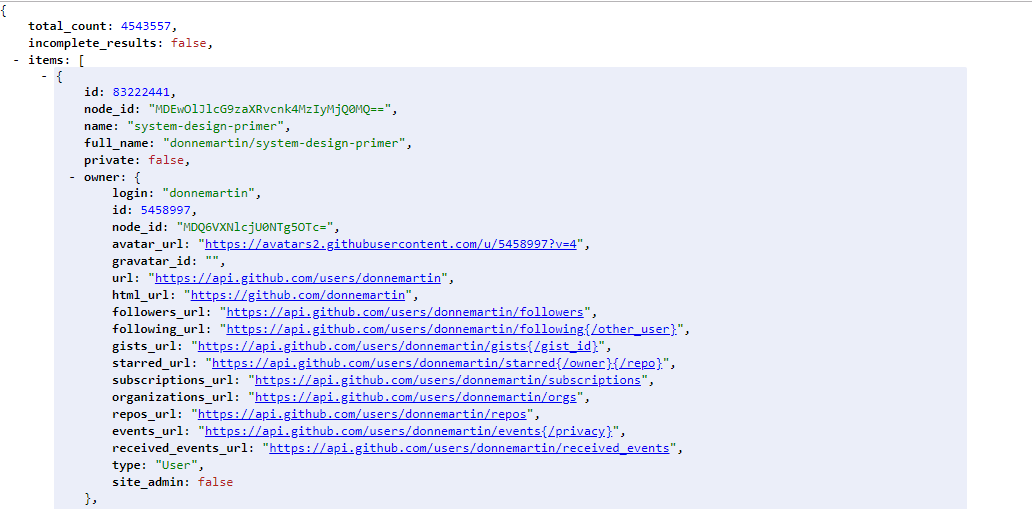

##**API Call details**
https://api.github.com/search/repositories?q=language:python&sort=stars

1. The APi call returns the bumber of python  project currently hosted on Github
2. The first part: https://api.github.com directs the request to the art of the website that responds to API calls. 
3. The next part: /search/repositorires/ tell API to conduct search thru ALL repos on github.  
4. The Question mark after repos is th "q" stands for query and "=" begins the query parameters **(q=)**
5. By using language:python tell api to get only repos that have Python as the primary language
6. The final part: **&sort=stars** sorts the project by the number of stars it has been given.
7. you can see the URL, its** NOT designed** to be entered by humans.. 

You can observe from the data the Github currently has 4,543,557 python projects on Github.  mcomplete results : false  means quesry was completed successfully


###**Installing Requests**

the request package allows python programs HTTP request capability and examination of the response that is returned 

In [3]:
pip install --user requests

###**Processing an API response**

Let start writing a program to issue an API call and process the repsonse 

In [4]:
import requests 

# Make an API call  and store the response #
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)

# store api response in a variable #
response_dict = r.json()

# Process the results #
print(response_dict.keys())

Status code: 200
dict_keys(['total_count', 'incomplete_results', 'items'])


NOTES: simple calls like this should return complete results, when writing mpore complciated programs, checking the status code makes a lot of sense. 

##**Working with the response dictionary** 

Now that we have the infromation from the API call stored as a dictionary, we can work with the data stored there. Lets generate some output that summarizes the information 

In [11]:
import requests 

# Make an API call  and store the response #
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)

# store api response in a variable #
response_dict = r.json()
print("total Repositories:", response_dict['total_count'])  # print the value of total count which represents the total count of repositories on github #

# Explore information about the repositories #
repo_dicts = response_dict['items']
print("Repositories Returned:", len(repo_dicts))

# Examine the first repository #
repo_dict = repo_dicts[0]
print("\nKeys:", len(repo_dict))
for key in sorted(repo_dict.keys()):
  print(key) 

Status code: 200
total Repositories: 4548374
Repositories Returned: 30

Keys: 74
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
trees_url
updated_at
url
watchers
watchers_count


In [17]:
import requests 

# Make an API call  and store the response #
url = 'https://api.github.com/search/repositories?q=language:python&sort=stars'
r = requests.get(url)
print("Status code:", r.status_code)

# store api response in a variable #
response_dict = r.json()
print("total Repositories:", response_dict['total_count'])  # print the value of total count which represents the total count of repositories on github #

# Explore information about the repositories #
repo_dicts = response_dict['items']
print("Repositories Returned:", len(repo_dicts))

# Examine the first repository #
repo_dict = repo_dicts[0]
print("\nSelected information about the 1st repository: ")
print('Name: ', repo_dict['name'])
print('Owner:', repo_dict['owner']['login'])
print('Stars:', repo_dict['stargazers_count'])
print('Repository:', repo_dict['html_url'])
print('Created:', repo_dict['created_at'])
print('Updated:', repo_dict['updated_at'])
print('decription:', repo_dict['description'])

Status code: 200
total Repositories: 4469446
Repositories Returned: 30

Selected information about the 1st repository: 
Name:  system-design-primer
Owner: donnemartin
Stars: 77552
Repository: https://github.com/donnemartin/system-design-primer
Created: 2017-02-26T16:15:28Z
Updated: 2019-12-04T20:01:42Z
decription: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.
